In [16]:
#Webscraping imports
from bs4 import BeautifulSoup
import requests

#Data Analysis/Wrangling imports
import pandas as pd
import numpy as np

#Data Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
BASE_URL = "https://www.metacritic.com/browse/games/score/metascore/all/all"

# Need a header, so that the Website didn't think, we are a bot
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [13]:

# Instantiate data list to store dictionaries with information on games in it.
data = []

#Manually checked, there are 195 pages (numbered 0 to 194 for metacritic) as of 2022/06/25
for i in range(195):
    
    #Timing how long each loop takes.
    start_time = time.time()
    
    # Use request library to call the webpage with headers as headers
    page = requests.get(BASE_URL,
                        params={'page': i},
                        headers = headers)

    # Create instance of BeautifulSoup with the html content of the page for scraping
    soup = BeautifulSoup(page.content, "html.parser")
    
    # Collect all containers in games based on class 'clamp-summary-wrap'
    games = soup.find_all('td', class_='clamp-summary-wrap')

    for game in games:

        #Instatiate a new dictionary for each game to store relevant information
        game_dict = dict()

        #Extracting the rank
        try:
            game_dict['rank'] = int(game.find('span', class_='title numbered').text.strip().strip('.'))
        except:
            game_dict['rank'] = np.nan

        #Extracting the title of the game
        try:
            game_dict['title'] = game.find('a', class_='title').text
        except:
            game_dict['title'] = np.nan

        #Extracting platform/console game has been released on
        try:
            game_dict['platform'] = game.find('div', class_='platform').find('span', class_='data').text.strip()
        except:
            game_dict['platform'] = np.nan

        #Release date
        try:
            game_dict['release_date'] = game.find('div', class_='clamp-details').find_all('span')[2].text        
        except:
            game_dict['release_date'] = np.nan

        #Summary of the game
        try:
            game_dict['summary'] = game.find('div', class_='summary').text.strip()            
        except:
            game_dict['summary'] = np.nan

        #Metacritic Score
        try:
            game_dict['metacritic_score'] = int(game.find('div', class_='metascore_w large game positive').text)
        except:
            game_dict['metacritic_score'] = np.nan

        #User Score
        try:
            game_dict['user_score'] = float(game.find('div', class_='metascore_w user large game positive').text)
        except:
            game_dict['user_score'] = np.nan

        data.append(game_dict)
    
    print(f'Scraped page {i+1} out of 195 in {round(time.time()-start_time, 2)} secs.')

Scraped page 1 out of 195 in 0.38 secs.
Scraped page 2 out of 195 in 0.36 secs.
Scraped page 3 out of 195 in 0.31 secs.
Scraped page 4 out of 195 in 0.26 secs.
Scraped page 5 out of 195 in 0.25 secs.
Scraped page 6 out of 195 in 0.31 secs.
Scraped page 7 out of 195 in 0.24 secs.
Scraped page 8 out of 195 in 0.34 secs.
Scraped page 9 out of 195 in 0.26 secs.
Scraped page 10 out of 195 in 0.24 secs.
Scraped page 11 out of 195 in 0.37 secs.
Scraped page 12 out of 195 in 0.24 secs.
Scraped page 13 out of 195 in 0.33 secs.
Scraped page 14 out of 195 in 0.26 secs.
Scraped page 15 out of 195 in 0.25 secs.
Scraped page 16 out of 195 in 0.31 secs.
Scraped page 17 out of 195 in 0.25 secs.
Scraped page 18 out of 195 in 0.24 secs.
Scraped page 19 out of 195 in 0.3 secs.
Scraped page 20 out of 195 in 0.25 secs.
Scraped page 21 out of 195 in 0.3 secs.
Scraped page 22 out of 195 in 0.32 secs.
Scraped page 23 out of 195 in 0.29 secs.
Scraped page 24 out of 195 in 0.31 secs.
Scraped page 25 out of 195 

In [15]:
games_df = pd.DataFrame(data)

In [18]:
#Checking datatypes for columns
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              19361 non-null  int64  
 1   title             19361 non-null  object 
 2   platform          19361 non-null  object 
 3   release_date      19361 non-null  object 
 4   summary           19361 non-null  object 
 5   metacritic_score  8289 non-null   float64
 6   user_score        7900 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.0+ MB


In [37]:
#Release date is not in a datetime format. We need to convert it to the correct datatype

games_df['release_date'] = pd.to_datetime(games_df['release_date'])

In [38]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rank              19361 non-null  int64         
 1   title             19361 non-null  object        
 2   platform          19361 non-null  object        
 3   release_date      19361 non-null  datetime64[ns]
 4   summary           19361 non-null  object        
 5   metacritic_score  8289 non-null   float64       
 6   user_score        7900 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.0+ MB


In [21]:
games_df.platform.unique()

array(['Nintendo 64', 'PlayStation', 'PlayStation 3', 'Dreamcast',
       'Xbox 360', 'Wii', 'Xbox One', 'PC', 'Switch', 'PlayStation 2',
       'PlayStation 4', 'GameCube', 'Xbox', 'Wii U', 'PlayStation 5',
       'Xbox Series X', 'Game Boy Advance', '3DS', 'DS',
       'PlayStation Vita', 'PSP', 'Stadia'], dtype=object)

In [39]:
top1000 = games_df.loc[:1000,:]

<AxesSubplot:xlabel='platform', ylabel='Count'>

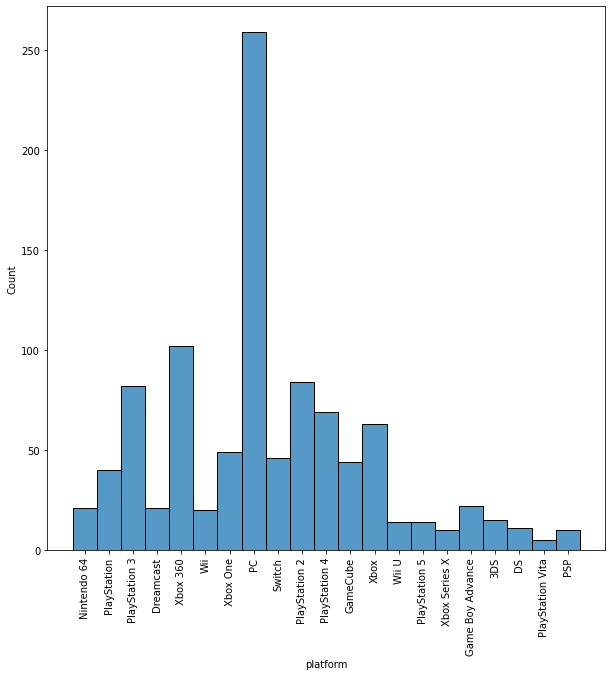

In [43]:
#Checking the platforms for top 1000 games

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.histplot(top1000.platform)

<AxesSubplot:xlabel='release_date', ylabel='Count'>

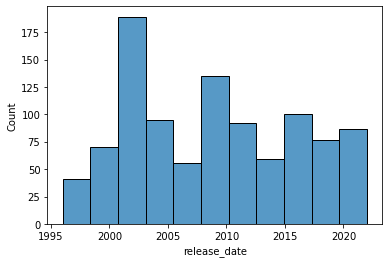

In [44]:
#Checking which year the top 1000 games were released in
sns.histplot(top1000.release_date.dt.year)